# Task 4.10

## Table of Content

##### 1 Importing Libraries and Datasets
##### 2 Consider any security implications that might exist for this new data
##### 3.1 Create a regional segmentation of the data
##### 3.2 Determining differences in spending habits between the different U.S. regions
##### 4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data
##### 5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants
##### 5.1 Profiling based on age
##### 5.2 Profiling based on income
##### 5.3 Profiling based on number of dependents nad family status
##### 5.4 Profiling based on department
##### 5.5 Creating other profiles based on combination of factors
##### 6 Create an appropriate visualization to show the distribution of profiles
##### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
##### 8 Compare your customer profiles with regions and departments
##### 9 Visualizations to answer the questions in the project brief
##### 10 Exporting the dataframes and vizualisations

## 1 Importing Libraries and Datasets

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating 'path' shortcut
path = r'C:\Users\Longus\Documents\26-02-2023 Instacart Basket Analysis'

In [3]:
#Importing dataset 'orders_products_customers.pkl'
df_ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers.pkl'))

In [4]:
#Importing dataset 'departments_wrangled.csv'
df_departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [5]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_freq,order_freq_flag,surname,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
#Downcasting the dataframe
for column in df_ords_prods_custs:
    if df_ords_prods_custs[column].dtype == 'float64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'float')
    if df_ords_prods_custs[column].dtype == 'int64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'integer')

## 2 Consider any security implications that might exist for this new data

In [7]:
#Displaying all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,surname,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### In previous task, the first name has been removed due to missing values. For security reasons the 'surname' column will be removed as well.

In [9]:
#Removing the 'surname' column
df_ords_prods_custs.drop('surname', axis = 1, inplace = True)

In [10]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3.1 Create a regional segmentation of the data

In [11]:
#Checking states counts in the dataframe
df_ords_prods_custs['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [12]:
#Defining the regions
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
#Creating a new 'region' column and assigning the values
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(region_1_NE), 'region'] = 'Northeast'

In [14]:
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(region_2_MW), 'region'] = 'Midwest'

In [15]:
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(region_3_S), 'region'] = 'South'

In [16]:
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(region_4_W), 'region'] = 'West'

In [17]:
#Checking the dataframe to see the new column 'region'
df_ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,gender,state,age,date_joined,number_dependants,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [18]:
#Checking the value count of 'region'
df_ords_prods_custs['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [19]:
df_ords_prods_custs['region'].value_counts(dropna = False).sum()

32404859

In [20]:
df_ords_prods_custs.shape

(32404859, 31)

#### The number of rows is the same which means that all rows in column 'region' have been populated

In [21]:
#Downcasting the dataframe again
for column in df_ords_prods_custs:
    if df_ords_prods_custs[column].dtype == 'float64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'float')
    if df_ords_prods_custs[column].dtype == 'int64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'integer')

## 3.2 Determining differences in spending habits between the different U.S. regions

In [22]:
#Creating a spending_habits crosstab
crosstab_spending_habits = pd.crosstab (df_ords_prods_custs['spending_flag'], df_ords_prods_custs['region'], dropna = False)

In [23]:
#Checking the differences in spending habits between different U.S. regions
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


## 4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [24]:
#Creating the 'activity_flag'(exclusion_flag)
df_ords_prods_custs.loc[df_ords_prods_custs['max_order'] < 5, 'activity_flag'] = 'low-activity'

In [25]:
df_ords_prods_custs.loc[df_ords_prods_custs['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [26]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [27]:
#Checking if the value count of 'activity_flag' equals to total number of rows
df_ords_prods_custs['activity_flag'].value_counts(dropna = False).sum()

32404859

In [28]:
#Downcasting the dataframe again
for column in df_ords_prods_custs:
    if df_ords_prods_custs[column].dtype == 'float64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'float')
    if df_ords_prods_custs[column].dtype == 'int64':
        df_ords_prods_custs[column] = pd.to_numeric(df_ords_prods_custs[column], downcast = 'integer')

In [29]:
#Creating a subset with only 'High activity' customers
high_activity_custs = df_ords_prods_custs[df_ords_prods_custs['activity_flag'] == 'High activity']

In [30]:
high_activity_custs.shape

(30964564, 32)

#### Subset will be exported at the end.

In [30]:
#Creating a subset with only 'Low activity' customers
low_activity_custs = df_ords_prods_custs[df_ords_prods_custs['activity_flag'] == 'Low activity']

## 5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants

### 5.1 Profiling based on age

In [31]:
#Checking the descriptive statistics of 'age' column
high_activity_custs['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [32]:
#Calculating the age percentiles
quartile_age = list(high_activity_custs['age'].quantile([0.25, 0.5, 0.75]))

In [33]:
quartile_age

[33.0, 49.0, 65.0]

#### Minimum age is 18, Maximum age is 81.
#### Based on the quartiles, I decided to divide the customer base into 3 groups: 1. Young Adult (18-33), 2. Middle Aged (34-65), 3. Senior (65+)

In [34]:
#Creating the 'age_category' column
high_activity_custs.loc[(high_activity_custs['age'] >= 18) & (high_activity_custs['age'] < 34), 'age_category'] = 'Young Adult'

C:\Users\Longus\AppData\Local\Temp\ipykernel_6360\3938736861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_custs.loc[(high_activity_custs['age'] >= 18) & (high_activity_custs['age'] < 34), 'age_category'] = 'Young Adult'


In [35]:
high_activity_custs.loc[(high_activity_custs['age'] >= 34) & (high_activity_custs['age'] < 65), 'age_category'] = 'Middle Aged'

In [36]:
high_activity_custs.loc[(high_activity_custs['age'] >= 65), 'age_category'] = 'Senior'

In [37]:
#Checkng count of values of 'age_category'
high_activity_custs['age_category'].value_counts(dropna = False)

Middle Aged    15011555
Senior          8195544
Young Adult     7757465
Name: age_category, dtype: int64

In [38]:
high_activity_custs['age_category'].value_counts(dropna = False).sum()

30964564

In [39]:
high_activity_custs.shape

(30964564, 33)

#### All rows have been populated

### 5.2 Profiling based on income

In [40]:
#Checking the descriptive statistics of 'income' column
high_activity_custs['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [41]:
#Calculating the income percentiles
quartile_income = list(high_activity_custs['income'].quantile([0.25, 0.5, 0.75]))

In [42]:
quartile_income

[67292.0, 96765.0, 128102.0]

#### Minimum income is 25903, Maximum is 593901. 
#### Based on the quartiles, I have divided the customer base into three groups: 1. Low Income (<67292), Middle Income (67293-128102), 3. High Income (>128102)

In [43]:
#Creating the 'income_category' column
high_activity_custs.loc[(high_activity_custs['income'] <= 67292), 'income_category'] = 'Low Income'

C:\Users\Longus\AppData\Local\Temp\ipykernel_6360\1733394237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_custs.loc[(high_activity_custs['income'] <= 67292), 'income_category'] = 'Low Income'


In [44]:
high_activity_custs.loc[(high_activity_custs['income'] > 67292) & (high_activity_custs['income'] <= 128102), 'income_category'] = 'Middle Income'

In [45]:
high_activity_custs.loc[(high_activity_custs['income'] > 128102), 'income_category'] = 'High Income'

In [46]:
#Checking count of values of 'income_category'
high_activity_custs['income_category'].value_counts(dropna = False)

Middle Income    15482125
Low Income        7741348
High Income       7741091
Name: income_category, dtype: int64

In [47]:
high_activity_custs['income_category'].value_counts(dropna = False).sum()

30964564

In [48]:
high_activity_custs.shape

(30964564, 34)

#### All rows have been populated

### 5.3 Profiling based on number of dependents nad family status

In [49]:
#Checking the descriptive statistics of 'number_dependants' column
high_activity_custs['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

In [50]:
#Creating a crosstab to see connection of 'family_status' with 'number_dependants'
family_crosstab = pd.crosstab(high_activity_custs['family_status'],high_activity_custs['number_dependants'],dropna = False)

In [51]:
family_crosstab

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [52]:
high_activity_custs.loc[(high_activity_custs['family_status'] == 'married') & (high_activity_custs['number_dependants'] == 1), 'household'] = 'Couple without child'

C:\Users\Longus\AppData\Local\Temp\ipykernel_6360\3845217152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_custs.loc[(high_activity_custs['family_status'] == 'married') & (high_activity_custs['number_dependants'] == 1), 'household'] = 'Couple without child'


In [53]:
high_activity_custs.loc[(high_activity_custs['family_status'] == 'married') & (high_activity_custs['number_dependants'].isin([2,3])), 'household'] = 'Couple with children'

In [54]:
high_activity_custs.loc[(high_activity_custs['family_status'] == 'divorced/widowed'), 'household'] = 'Single Person Household'

In [55]:
high_activity_custs.loc[(high_activity_custs['family_status'] == 'single'), 'household'] = 'Single Person Household'

In [56]:
high_activity_custs.loc[(high_activity_custs['family_status'] == 'living with parents and siblings'), 'household'] = 'Other household'

In [57]:
#Checking count of values of 'household'
high_activity_custs['household'].value_counts(dropna = False)

Couple with children       14532650
Single Person Household     7739681
Couple without child        7211061
Other household             1481172
Name: household, dtype: int64

In [58]:
high_activity_custs['household'].value_counts(dropna = False).sum()

30964564

In [59]:
high_activity_custs.shape

(30964564, 35)

### 5.4 Profiling based on department

In [60]:
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
#Renaming 'Unnamed: 0' to 'department_id'
df_departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [62]:
#Checking what product category each department_id corresponds to
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [63]:
#Creating a profile for customers that eat meat 
high_activity_custs.loc[high_activity_custs['department_id'] == 11, 'profile'] = 'Meat Eaters'

C:\Users\Longus\AppData\Local\Temp\ipykernel_6360\3015982259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_custs.loc[high_activity_custs['department_id'] == 11, 'profile'] = 'Meat Eaters'


In [64]:
#Creating a profile for customers that drink alcohol
high_activity_custs.loc[high_activity_custs['department_id'] == 5, 'profile'] = 'Alcohol Drinkers'

In [65]:
#Creating a profile for pet owners
high_activity_custs.loc[high_activity_custs['department_id'] == 8, 'profile'] = 'Pet Owners'

### 5.5 Creating other profiles based on combination of factors

In [66]:
#Creating a profile for customers in low income families
high_activity_custs.loc[(high_activity_custs['number_dependants'] > 1) & (high_activity_custs['income_category'] == 'Low Income'), 'profile'] = 'Low income family'

In [67]:
#Creating a profile for customers in average income families
high_activity_custs.loc[(high_activity_custs['number_dependants'] > 1) & (high_activity_custs['income_category'] == 'Middle Income'), 'profile'] = 'Average income family'

In [83]:
#Creating a profile for customers in high income families
high_activity_custs.loc[(high_activity_custs['number_dependants'] > 1) & (high_activity_custs['income_category'] == 'High Income'), 'profile'] = 'High income family'

In [69]:
#Creating a profile for customers that are young and have high income
high_activity_custs.loc[(high_activity_custs['age_category'] == 'Young Adult') & (high_activity_custs['income_category'] == 'High Income'), 'profile'] = 'Rich Young Adult'

In [70]:
#Creating a profile for customers that are middle aged and have high income
high_activity_custs.loc[(high_activity_custs['age_category'] == 'Middle Aged') & (high_activity_custs['income_category'] == 'High Income'), 'profile'] = 'Rich Middle Aged'

In [71]:
#Creating a profile for customers that are senior and have high income
high_activity_custs.loc[(high_activity_custs['age_category'] == 'Senior') & (high_activity_custs['income_category'] == 'High Income'), 'profile'] = 'Rich Senior' 

In [72]:
#Filling NaN as "other"
high_activity_custs['profile'] = high_activity_custs['profile'].fillna('other')

C:\Users\Longus\AppData\Local\Temp\ipykernel_6360\3065362639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_custs['profile'] = high_activity_custs['profile'].fillna('other')


In [84]:
high_activity_custs['profile'].value_counts(dropna = False)

other                    11354953
Average income family     7738821
Low income family         3884192
High income family        3882764
Rich Middle Aged          2275559
Rich Senior               1540780
Meat Eaters                158958
Alcohol Drinkers            51704
Rich Young Adult            41988
Pet Owners                  34845
Name: profile, dtype: int64

## 6 Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 0, 'Customer Profiles')

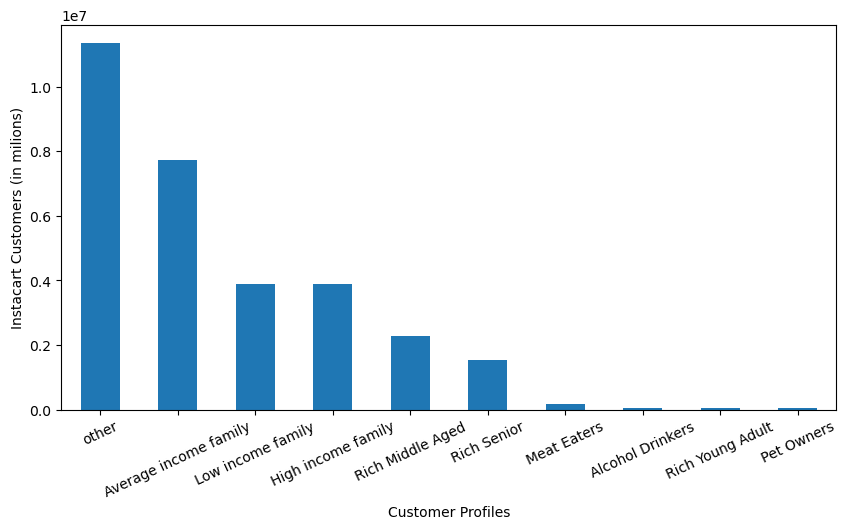

In [166]:
#Creating a bar chart with the profiles
bar_profiles = high_activity_custs['profile'].value_counts().plot.bar(rot = 25, figsize = (10,5))
plt.ylabel ('Instacart Customers (in milions)')
plt.xlabel ('Customer Profiles')

Text(0.5, 0, 'Age Category')

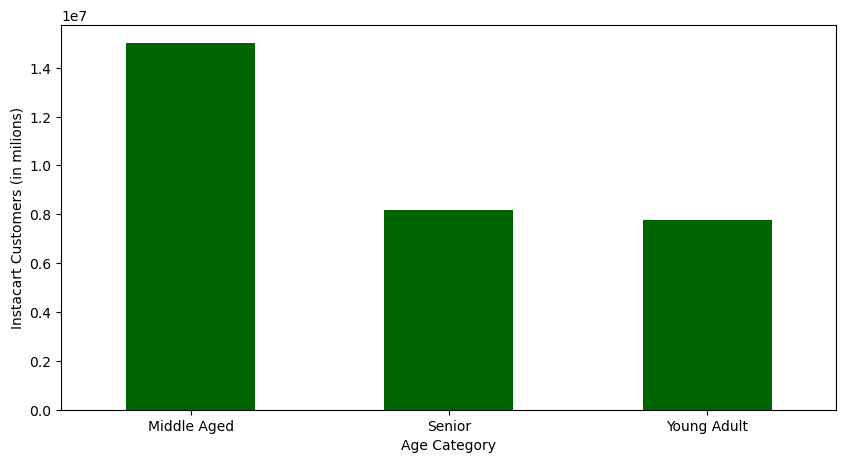

In [165]:
#Creating a bar chart with the 'age_category'
bar_age = high_activity_custs['age_category'].value_counts().plot.bar(rot = 0, figsize = (10,5), color = 'darkgreen')
plt.ylabel ('Instacart Customers (in milions)')
plt.xlabel ('Age Category')

Text(0.5, 0, 'Income Category')

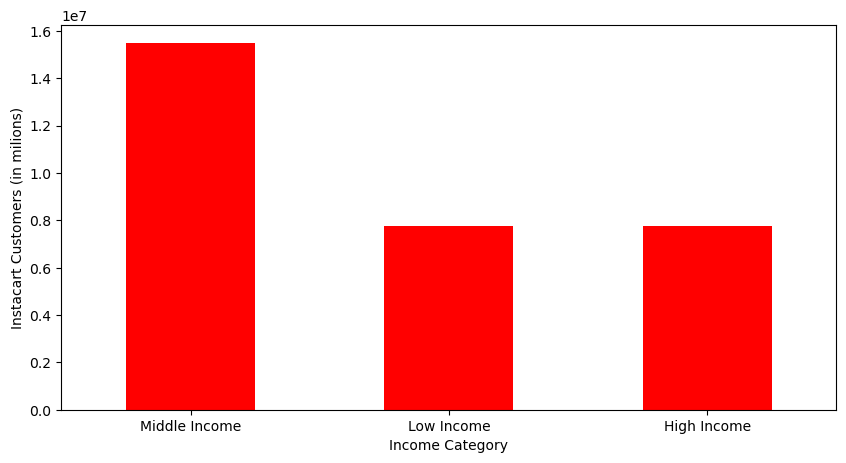

In [167]:
#Creating a bar chart with the 'income_category'
bar_income = high_activity_custs['income_category'].value_counts().plot.bar(rot = 0, figsize = (10,5), color = 'red')
plt.ylabel ('Instacart Customers (in milions)')
plt.xlabel ('Income Category')

Text(0.5, 0, '')

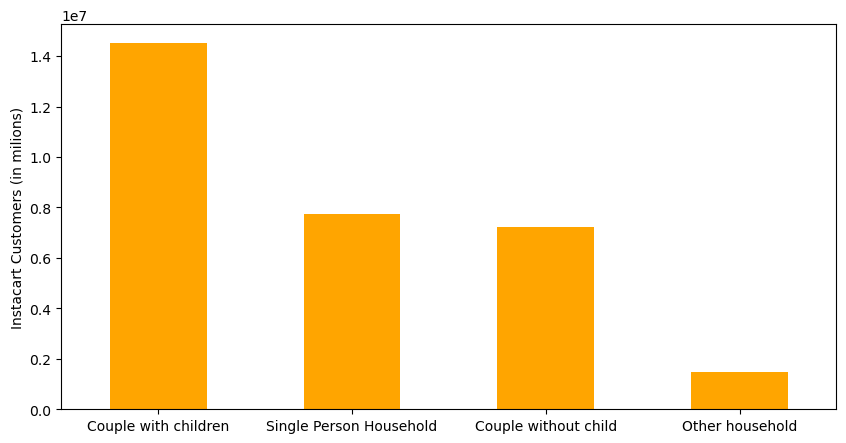

In [169]:
#Creating a bar chart with the 'household'
bar_household = high_activity_custs['household'].value_counts().plot.bar(rot = 0, figsize = (10,5), color = 'orange')
plt.ylabel ('Instacart Customers (in milions)')
plt.xlabel ('')

## 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [89]:
high_activity_custs.groupby('profile').agg({'prices':['max', 'min', 'mean'], 'days_since_prior_order':['max', 'min', 'mean']})

prices                days_since_prior_order       \
                         max  min      mean                    max  min   
profile                                                                   
Alcohol Drinkers        15.0  1.0  8.050108                   30.0  0.0   
Average income family   25.0  1.0  7.952906                   30.0  0.0   
High income family      25.0  1.0  7.954694                   30.0  0.0   
Low income family       25.0  1.0  7.294760                   30.0  0.0   
Meat Eaters             15.0  1.0  8.011526                   30.0  0.0   
Pet Owners              15.0  1.0  7.899922                   30.0  0.0   
Rich Middle Aged        25.0  1.0  7.941129                   30.0  0.0   
Rich Senior             25.0  1.0  7.960154                   30.0  0.0   
Rich Young Adult        25.0  1.0  7.753322                   30.0  0.0   
other                   25.0  1.0  7.735866                   30.0  0.0   

                                  
                            mean  
profile                           
Alcohol Drinkers       10.064628  
Average income family  10.775546  
High income family     10.780449  
Low income family      10.962736  
Meat Eaters            11.389248  
Pet Owners             11.782070  
Rich Middle Aged       10.773468  
Rich Senior            10.706337  
Rich Young Adult        9.422276  
other                  10.811167

## 8 Compare your customer profiles with regions and departments

In [90]:
#Comparing customer profiles and regions
crosstab_profile_region = pd.crosstab(high_activity_custs['profile'], high_activity_custs['region'], dropna = False)

In [91]:
crosstab_profile_region

region,Midwest,Northeast,South,West
profile,,,,
Alcohol Drinkers,12571,8527,17084,13522
Average income family,1771992,1364251,2611583,1990995
High income family,925529,691221,1278972,987042
Low income family,899759,677722,1299026,1007685
Meat Eaters,37638,27512,53058,40750
Pet Owners,8669,6558,10862,8756
Rich Middle Aged,554885,381637,751757,587280
Rich Senior,351471,293010,501637,394662
Rich Young Adult,9953,6970,16901,8164


([<matplotlib.axis.XTick at 0x149fe520820>,
 [Text(0, 0, 'Alcohol Drinkers'),
  Text(1, 0, 'Average income family'),
  Text(2, 0, 'High income family'),
  Text(3, 0, 'Low income family'),
  Text(4, 0, 'Meat Eaters'),
  Text(5, 0, 'Pet Owners'),
  Text(6, 0, 'Rich Middle Aged'),
  Text(7, 0, 'Rich Senior'),
  Text(8, 0, 'Rich Young Adult'),
  Text(9, 0, 'other')])

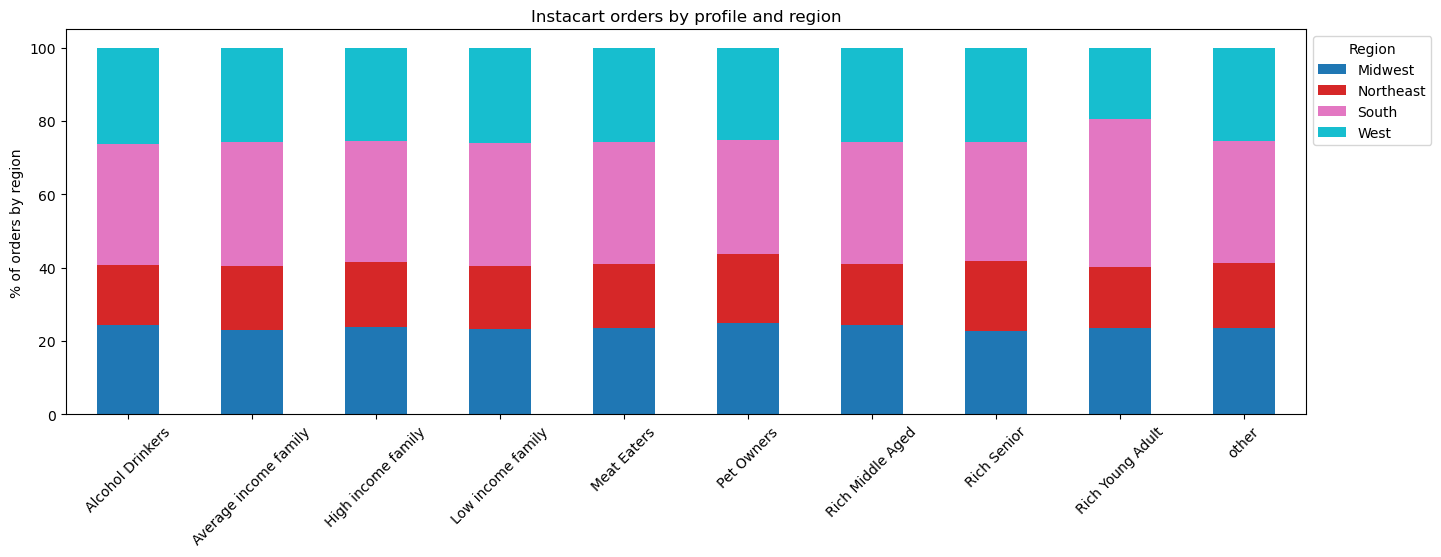

In [92]:
#Creating a stacked bar chart for % of orders by profile and region
bar_profile_region = crosstab_profile_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(16,5), colormap = 'tab10').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")
plt.xticks([0,1,2,3,4,5,6,7,8,9],['Alcohol Drinkers', 'Average income family', 'High income family', 'Low income family', 'Meat Eaters', 'Pet Owners', 'Rich Middle Aged', 'Rich Senior', 'Rich Young Adult', 'other'])

#### The Southern region has the highest percentage of orders among all profiles. The region struggling the most is Northeast

In [81]:
#Comparing customer profiles and departments
crosstab_profile_department = pd.crosstab(high_activity_custs['profile'], high_activity_custs['department_id'], dropna = False)

In [82]:
crosstab_profile_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Alcohol Drinkers,0,0,0,0,51704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Average income family,536196,8456,280868,2330727,34199,65448,603778,23112,215154,8160,105375,182646,454764,159655,262157,1313277,171334,111061,604484,251487,16483
Low income family,258219,4119,132451,1067005,17862,28347,372931,10159,90082,5062,53853,64360,208275,94035,111226,613266,92473,42697,485113,124605,8052
Meat Eaters,0,0,0,0,0,0,0,0,0,0,158958,0,0,0,0,0,0,0,0,0,0
Pet Owners,0,0,0,0,0,0,0,34845,0,0,0,0,0,0,0,0,0,0,0,0,0
Rich Middle Aged,314533,5016,169421,1337258,23102,38324,359085,13985,124667,4374,61536,106458,267510,95275,156112,768098,101863,62196,350929,146915,9610
Rich Senior,219525,3467,116618,934751,15126,26305,251805,10484,85779,3156,43023,74457,184317,65382,106522,530347,71487,42487,244120,101804,6575
Rich Young Adult,7014,228,4384,17563,2634,711,7627,475,2475,11,1561,1965,5347,2220,3227,15563,3907,991,6938,2297,149
other,786244,13125,417086,3391969,0,96856,976675,0,303979,12688,0,244895,662492,254283,372830,1936631,258793,150960,1074822,376726,23899


## 9 Visualizations to answer the questions in the project brief

### What are the busiest days of the week and hours of the day?

Text(0, 0.5, 'Orders made(in millions)')

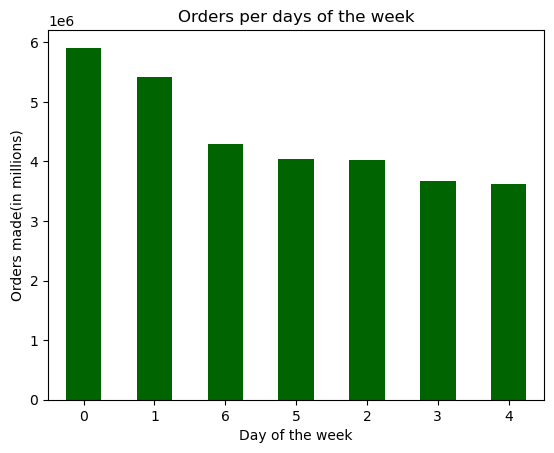

In [125]:
#Creating a bar chart for counts of values of 'order_day_of_week'
bar_order_dow = high_activity_custs['order_day_of_week'].value_counts(dropna = False).plot.bar(rot = 0, color = 'darkgreen')
plt.title('Orders per days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Orders made(in millions)')

Text(0, 0.5, 'Orders made(in millions)')

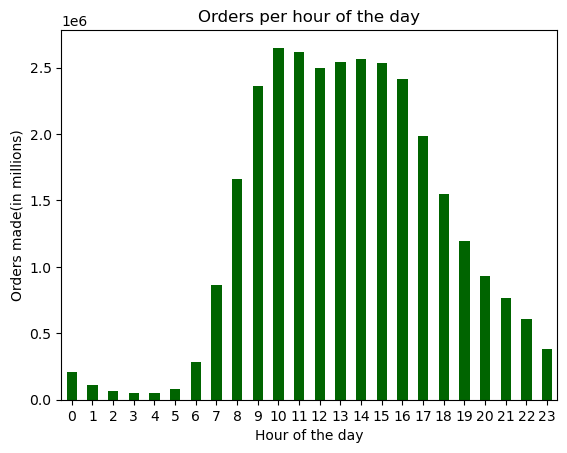

In [124]:
#Creating a histogram for count of values of 'order_hour_of_day'
hist_order_hod = high_activity_custs['order_hour_of_day'].value_counts(dropna = False).sort_index().plot.bar(rot = 0, color = 'darkgreen')
plt.title('Orders per hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Orders made(in millions)')

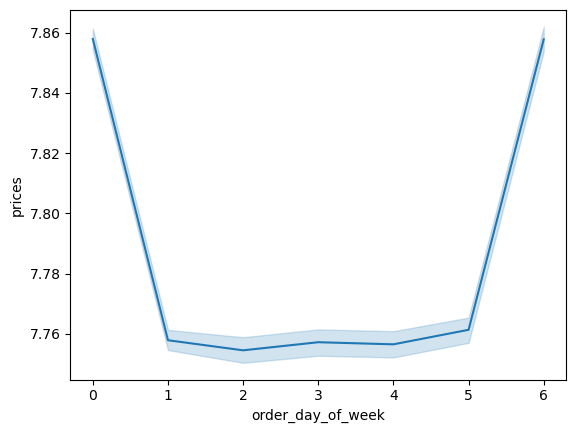

In [35]:
#Creating a line chart for customers spending per DOW
line_prices_dow2 = sns.lineplot(data=high_activity_custs, x='order_day_of_week', y='prices')

### Are there are particular times of the day when people spend the most money?

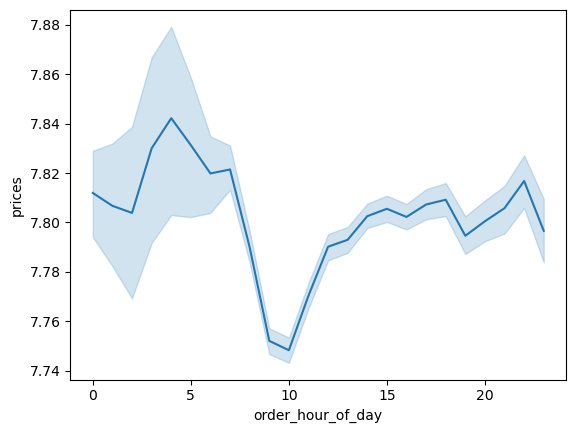

In [42]:
#Creating a line chart for customers spending per HOD
line_prices_hod = sns.lineplot(data = high_activity_custs, x = 'order_hour_of_day', y = 'prices')

### Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0.5, 1.0, 'Instacart Products Price Range')

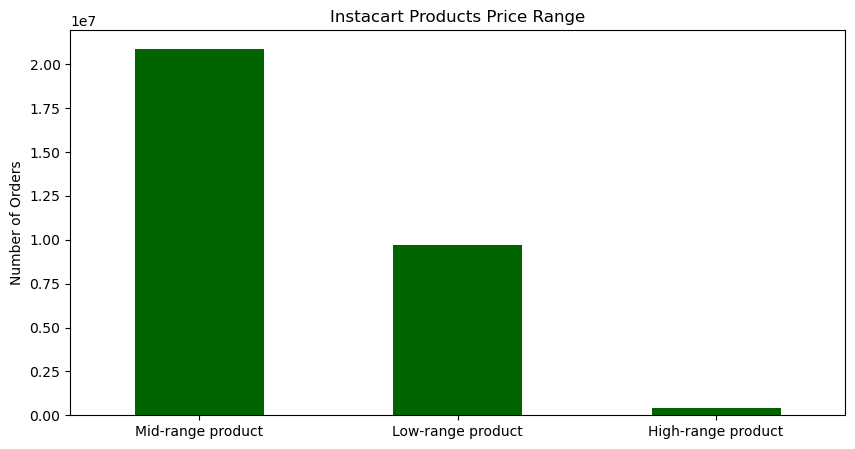

In [130]:
#Creating a bar chart with the price range of the products
bar_price_range = high_activity_custs['price_range_loc'].value_counts(dropna = False).plot.bar(rot = 0, figsize = (10,5), color = 'darkgreen')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Instacart Products Price Range')

Text(0, 0.5, 'Number of Orders(in millions)')

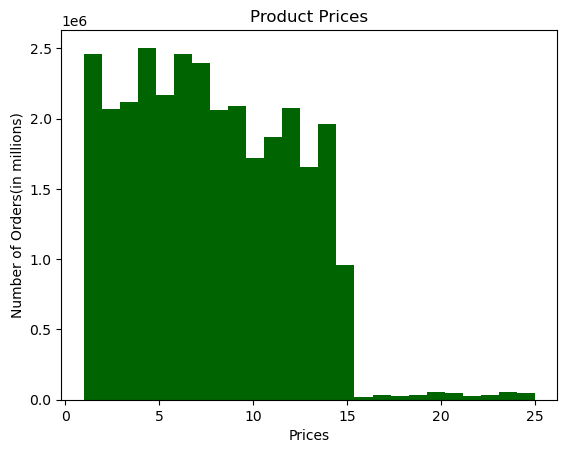

In [103]:
#Creating a histogram for the 'prices' column
hist_prices = high_activity_custs['prices'].plot.hist(bins = 25, color = 'darkgreen')
plt.title('Product Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Orders(in millions)')

### Are there certain types of products that are more popular than others?

In [104]:
#Creating a crosstab between 'department_id' and 'price_range_loc'
crosstab_department_price_range = pd.crosstab(high_activity_custs['department_id'], high_activity_custs['price_range_loc'], dropna = False)

In [105]:
crosstab_department_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


Text(0, 0.5, 'Number of Orders(in millions)')

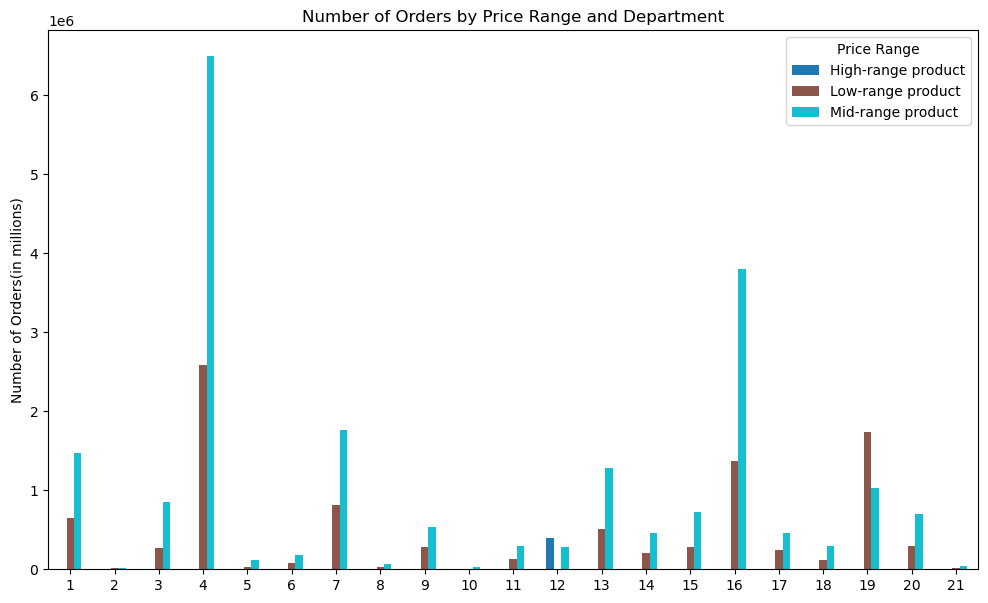

In [126]:
#Creating a chart showing number of orders per 'price_range_loc' and department_id
bar_department_price_range = crosstab_department_price_range.plot.bar(rot = 0, figsize = (12,7), colormap = 'tab10' ).legend(title = 'Price Range')
plt.title('Number of Orders by Price Range and Department')
plt.xlabel('')
plt.ylabel('Number of Orders(in millions)')

### What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0, 0.5, 'Number of Customers')

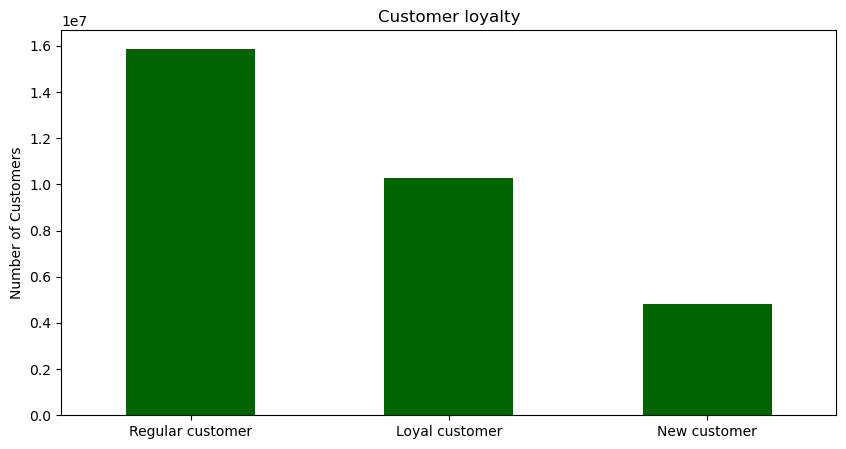

In [132]:
#Creating a bar chart of distribution of 'loyalty_flag'
bar_loyalty = high_activity_custs['loyalty_flag'].value_counts(dropna = False).plot.bar(rot = 0, figsize = (10,5), color = 'darkgreen')
plt.title('Customer loyalty')
plt.xlabel('')
plt.ylabel('Number of Customers')

### Are there differences in ordering habits based on a customer’s loyalty status?

In [134]:
#Creating a crosstab between 'days_since_prior_order' and 'loyalty_flag'
crosstab_loyalty_prior_order = pd.crosstab(high_activity_custs['days_since_prior_order'], high_activity_custs['loyalty_flag'], dropna = False)

In [135]:
crosstab_loyalty_prior_order

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


Text(0, 0.5, '% of Customer loyalty category')

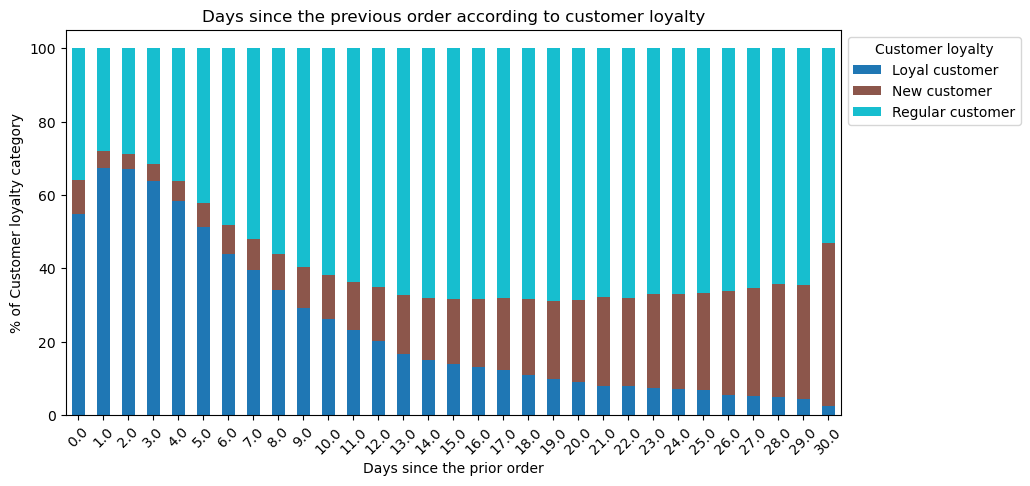

In [136]:
#Creating a stacked bar chart of customer loyalty and days since prior order
bar_loyalty_prior_order = crosstab_loyalty_prior_order.loc[:,['Loyal customer','New customer','Regular customer']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(10,5), colormap = 'tab10').legend(title="Customer loyalty", bbox_to_anchor=(1.0,1.0))
plt.title ("Days since the previous order according to customer loyalty")
plt.xlabel("Days since the prior order")
plt.ylabel("% of Customer loyalty category")

In [137]:
#Creating a crosstab between 'department_id' and 'loyalty_flag'
crosstab_department_loyalty = pd.crosstab(high_activity_custs['department_id'], high_activity_custs['loyalty_flag'], dropna = False)

In [138]:
crosstab_department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


Text(0, 0.5, 'Number of Orders(in millions)')

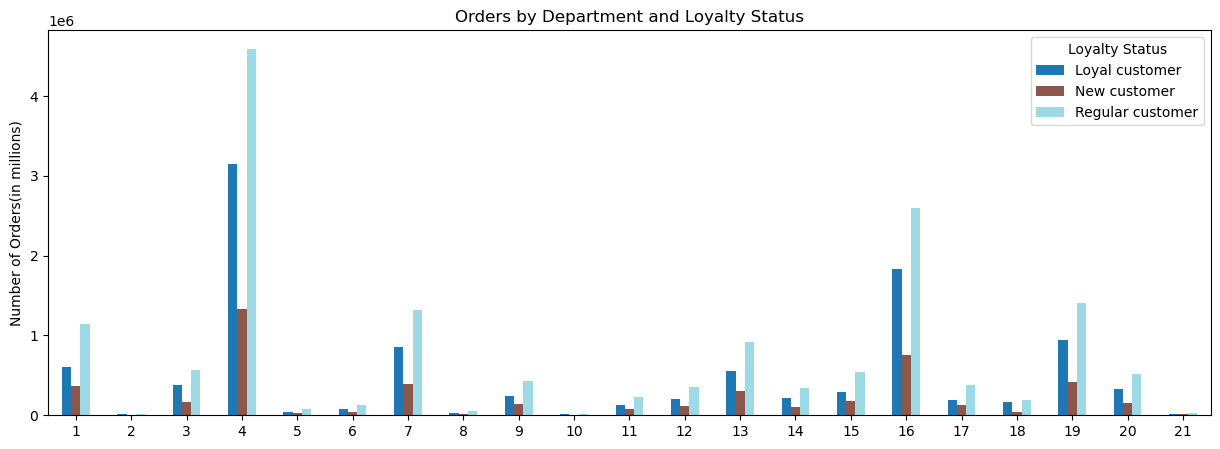

In [142]:
#Creating a bar chart of number of orders per department and loyal customers
bar_department_loyalty = crosstab_department_loyalty.plot.bar(rot = 0, figsize = (15,5), colormap = 'tab20').legend(title = 'Loyalty Status')
plt.title('Orders by Department and Loyalty Status')
plt.xlabel('')
plt.ylabel('Number of Orders(in millions)')

### Are there differences in ordering habits based on a customer’s region?

Text(0, 0.5, 'Number of orders')

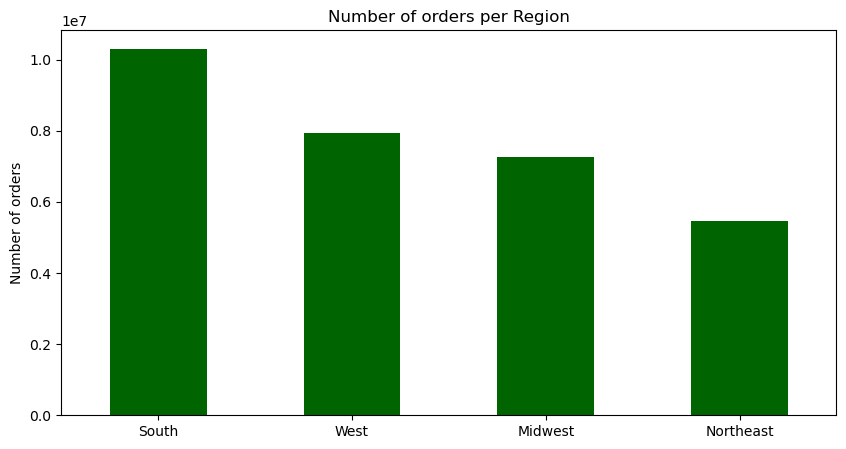

In [148]:
#Creating a bar chart of number of orders per Region
bar_region = high_activity_custs['region'].value_counts(dropna = False).plot.bar(rot = 0, figsize = (10,5), color = 'darkgreen')
plt.title('Number of orders per Region')
plt.xlabel('')
plt.ylabel('Number of orders')

In [152]:
#Creating a crosstab between 'region' and 'spending_flag'
crosstab_spending_region = pd.crosstab(high_activity_custs['region'], high_activity_custs['spending_flag'], dropna = False)

In [153]:
crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


Text(0, 0.5, 'Number of customers')

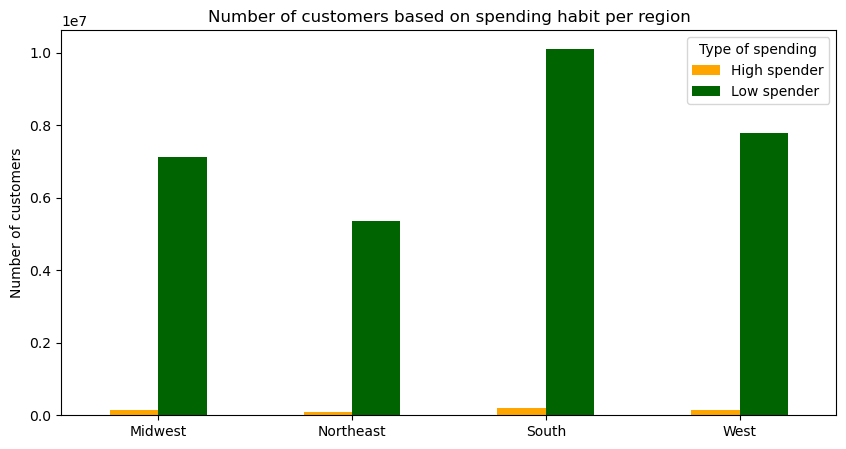

In [160]:
#Creating a bar chart of number of customers per region and spending habit
bar_spending_region = crosstab_spending_region.plot.bar(rot = 0, figsize = (10,5), color = ['orange','darkgreen']).legend(title = 'Type of spending')
plt.title('Number of customers based on spending habit per region')
plt.xlabel('')
plt.ylabel('Number of customers')

In [161]:
#Creating a crosstab between 'region' and 'loyalty_flag'
crosstab_region_loyalty = pd.crosstab(high_activity_custs['region'],high_activity_custs['loyalty_flag'], dropna = False)

In [162]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0, 0.5, 'Number of customers')

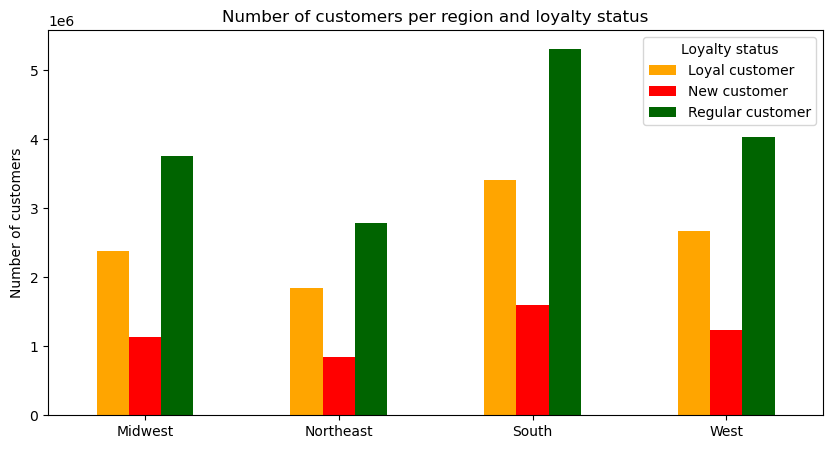

In [164]:
#Creating a bar chart of number of customers per region and loyalty status
bar_region_loyalty = crosstab_region_loyalty.plot.bar(rot = 0, figsize = (10,5), color = ['orange', 'red', 'darkgreen']).legend(title = 'Loyalty status')
plt.title('Number of customers per region and loyalty status')
plt.xlabel('')
plt.ylabel('Number of customers')

## 10 Exporting the dataframes and visualizations

In [171]:
#Exporting the dataframe high_activity_custs in .pkl
high_activity_custs.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

In [172]:
#Exporting the dataframe low_activity_custs in .pkl
low_activity_custs.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [173]:
#Exporting a bar chart with the profiles
bar_profiles.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_profiles.png'), bbox_inches = 'tight')

In [174]:
#Exporting a bar chart with the 'age_category'
bar_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age.png'), bbox_inches = 'tight')

In [175]:
#Exporting a bar chart with the 'income_category'
bar_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income.png'), bbox_inches = 'tight')

In [176]:
#Exporting a bar chart with the 'household'
bar_household.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_household.png'), bbox_inches = 'tight')

In [177]:
#Exporting a stacked bar chart for % of orders by profile and region
bar_profile_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_profile_region.png'), bbox_inches = 'tight')

In [178]:
#Exporting a bar chart for counts of values of 'order_day_of_week'
bar_order_dow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_order_dow.png'), bbox_inches = 'tight')

In [179]:
#Exporting a histogram for count of values of 'order_hour_of_day'
hist_order_hod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_order_hod.png'), bbox_inches = 'tight')

In [41]:
#Exporting a line chart for customers spending per DOW
line_prices_dow2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices_dow.png'), bbox_inches = 'tight')

In [43]:
line_prices_hod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices_hod.png'), bbox_inches = 'tight')

In [185]:
#Exporting a bar chart with the price range of the products
bar_price_range.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_price_range.png'), bbox_inches = 'tight')

In [186]:
#Exporting a histogram for the 'prices' column
hist_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'), bbox_inches = 'tight')

In [187]:
#Exporting a chart showing number of orders per 'price_range_loc' and department_id
bar_department_price_range.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_price_range.png'), bbox_inches = 'tight')

In [188]:
#Exporting a bar chart of distribution of 'loyalty_flag'
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'), bbox_inches = 'tight')

In [189]:
#Exporting a stacked bar chart of customer loyalty and days since prior order
bar_loyalty_prior_order.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_prior_order.png'), bbox_inches = 'tight')

In [190]:
#Exporting a bar chart of number of orders per department and loyal customers
bar_department_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_loyalty.png'), bbox_inches = 'tight')

In [191]:
#Exporting a bar chart of number of orders per Region
bar_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region.png'), bbox_inches = 'tight')

In [192]:
#Exporting a bar chart of number of customers per region and spending habit
bar_spending_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spending_region.png'), bbox_inches = 'tight')

In [193]:
#Exporting a bar chart of number of customers per region and loyalty status
bar_region_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_loyalty.png'), bbox_inches = 'tight')